In [3]:
import numpy as np

In [30]:
def simulate(n):
    z_x=np.ones(n,dtype=float)
    z_y=np.ones(n,dtype=float)
    x=np.random.uniform(0,2/n)
    y=np.random.uniform(0,2/n)
    m=0
    while m<n-1:
        e_1=np.random.uniform(0,2/n)
        e_2=np.random.uniform(0,2/n)
        if e_1>0 and x+e_1<1:
            x+=e_1
            z_x[m]=x
        if e_2>0 and y+e_2<1:
            y+=e_2
            z_y[m]=y
        m+=1 
    return z_x,z_y

In [42]:
#x,y
x,y=simulate(10)

In [32]:
def minimize(x):
    n=len(x)
    S=np.zeros(n)
    for i in range(n):
        s=np.sum(x[:i])-np.sum(x[i:])+n-i
        S[i]=s
    return x[np.argmin(S)]
    

In [33]:
minimize(x) #x*

0.635989537974278

In [34]:
minimize(y) #y*

0.5681384651916248

In [36]:
n=np.arange(10,1000,10)
Y=[]
for i in n:
    x,y=simulate(i)
    y_=minimize(y)
    Y.append(y_)
    

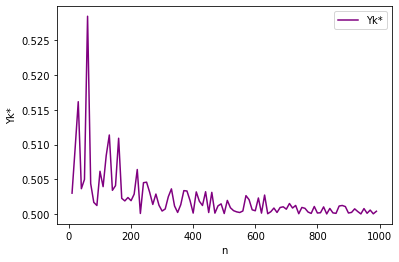

In [39]:
#converge to 0.5
#To minimize the sum, it will avoid any value that is larger than 0.5
import matplotlib.pyplot as plt
plt.plot(n,Y,label='Yk*',color='purple')
plt.xlabel('n')
plt.ylabel('Yk*')
plt.legend()
plt.show()

# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [46]:
# [Answer to ex. 12.1.1 here]
import pandas as pd
data=pd.read_csv('peer_effects_room.csv')

In [47]:
for i in data.groupby('room').person.unique():
    data.loc[i[0],'person_other']=i[1]
    data.loc[i[1],'person_other']=i[0]     

In [48]:
data.person_other=data.person_other.astype(int)

<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [49]:
data2=data[['person','high_school_GPA','college_GPA']]

In [50]:
data2.columns=['person_other','high_school_GPA','college_GPA']

In [51]:
data=data.merge(data2,on='person_other',how = 'left')

In [52]:
data.head()

,person,room,high_school_GPA_x,college_GPA_x,person_other,high_school_GPA_y,college_GPA_y
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
2,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
3,3,751,-1.303115,0.982488,1099,-1.812137,-2.267394
4,4,698,0.156678,-0.371632,1708,-0.327219,0.670683


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

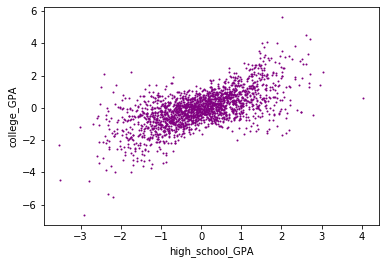

In [26]:
# [Answer to ex. 12.1.3 here]
import matplotlib.pyplot as plt
plt.scatter(data.high_school_GPA_x,data.college_GPA_x,s=1,c='purple')
plt.ylabel('college_GPA')
plt.xlabel('high_school_GPA')
plt.show()

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

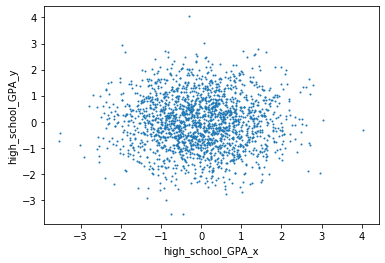

In [27]:
plt.scatter(data.high_school_GPA_y,data.high_school_GPA_x,s=1)
plt.ylabel('high_school_GPA_y')
plt.xlabel('high_school_GPA_x')
plt.show()

In [53]:
import statsmodels.formula.api as smf

In [29]:
result = smf.ols('high_school_GPA_x ~ high_school_GPA_y ', data).fit()

In [30]:
# p>>0.05,
#There is no correlated effects, it is random assignment.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      high_school_GPA_x   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Thu, 21 May 2020   Prob (F-statistic):              0.788
Time:                        17:48:02   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_y    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

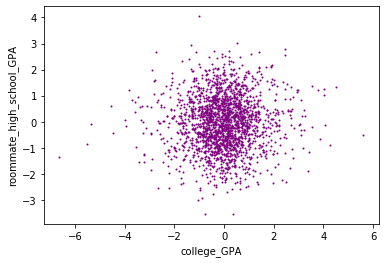

In [31]:
# [Answer to ex. 12.1.5 here]
plt.scatter(data.college_GPA_x,data.high_school_GPA_y,s=1,c='purple')
plt.xlabel('college_GPA')
plt.ylabel('roommate_high_school_GPA')
plt.show()

In [35]:
result = smf.ols('college_GPA_x ~ high_school_GPA_x +high_school_GPA_y ', data).fit() 

In [36]:
#There is a minor contextual peer effect,
#the students college performance is not significantly related to the roommate's high school GPA,
#but significantly positively related to his own high school performance
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 21 May 2020   Prob (F-statistic):          1.03e-223
Time:                        17:50:02   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA_x     0.7059      0.019     36.606      0.000       0.668       0.744
high_school_GPA_y     0.0356      0.019      1.847      0.065      -0.002       0.073
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [37]:
#There is a significant endogenous peer effect, which is the individual expections of others,
#the students performance is positively related to the roommates GPA.
result_1 = smf.ols('college_GPA_x ~ high_school_GPA_x+college_GPA_y', data).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Thu, 21 May 2020   Prob (F-statistic):          4.46e-226
Time:                        17:51:12   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.020     -1.059      0.290      -0.059       0.018
high_school_GPA_x     0.7036      0.019     36.574      0.000       0.666       0.741
college_GPA_y         0.0654      0.017      3.788      0.000       0.032       0.099
==============================================================================
Omnibus:                       78.932   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.446
Skew:                          -0.117   Prob(JB):                     2.23e-48
Kurtosis:                       4.606   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

I didnt actually find the identification strategy in the translated text. I assume that this is about their research design and how they solve selection problem. They estimate the of socio-economic background of classmates on the indiviudal students performance using the background of the variation in the student composition from year to year within each school. They assume that the parents will not know the variation, thus there is no selection. They also analyse age group instead of class.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

It assumes that the variation in the composition of student background information is completely random, and is independent of observable and unobservable characterstics. This might be problematic. Moreover, as illustrated in the course, the linear in mean model could not seperate the unobserved engodenous peer effect from exogenous effects. Hoxby also use a source of variation in the peers in public schools to solve self-selection or selection by other forces problem.

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

Maybe the peer effects across schools can also be estimated like pupils in the same region.